# Plotting Band Structure and Optical Conductivity of Graphene with Wannier90 and Tight-Binding Method
Bagian ini disertai juga plotting untuk Non-Linear Shift dari GaAs. 

By Aan

In [1]:
# numerical module
import numpy as np

#setup plotting 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('./style/SciencePlots-APS.mplstyle')

### Band Structure

1. Menggunakan Wannier90

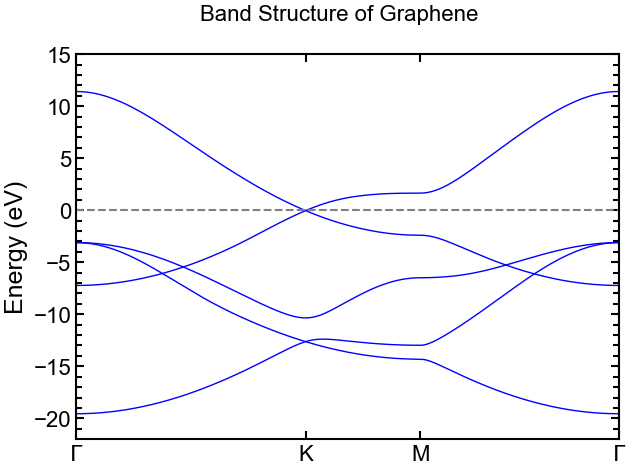

In [22]:
# module to load bandstructure data
def read_band(fname, EFermi):
    band_data = np.loadtxt(fname)
    EF = EFermi
    kDist = np.unique(band_data[:, 0])
    numBand = len(band_data[band_data[:, 0] == kDist[1]])
    Bands = (np.reshape(band_data[:, 1], (-1, len(kDist))).T) - EF
    return kDist, Bands

# load bandstructure of Wannier90
k_w90, en_w90 = read_band('./tight-binding fitting/gr_band.dat', EFermi=-1.6773)
# high-symmetry from w90 [1/Angstrom]
kNode = np.array([0.00000, 1.70003, 2.55005, 4.02233])
# label of high-symmetry
kLabel = (r'$\Gamma$', r'K', r'M', r'$\Gamma$')

# plotting
fig, ax = plt.subplots(1, figsize=(7,5))

#------------------------#
# plot bandstructure
#------------------------#
for i in range(0, en_w90.shape[1]):
    ax.plot(k_w90, en_w90[:, i], color='blue', lw=1)
# X-axis
ax.set_xlim(kNode[0], kNode[-1])
ax.set_xticks(kNode)
ax.set_xticklabels(kLabel)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)
# Y-axis
ax.set_ylabel('Energy (eV)')
ax.set_ylim(-22.0, 15.0)
ax.axhline(0.0, color='gray', ls='--', lw=1.5)

# save figure
fig.suptitle('Band Structure of Graphene', fontsize=16)
fig.savefig('./Bandstructure_Graphene_W90.png', dpi=600)
plt.show()

2. Menggunakan Tight-Binding Method

----- k_path report begin ----------
real-space lattice vectors
 [[ 2.46392  0.       0.     ]
 [-1.23196  2.13382  0.     ]
 [ 0.       0.      15.     ]]
k-space metric tensor
 [[0.21963 0.10981 0.     ]
 [0.10981 0.21963 0.     ]
 [0.      0.      0.00444]]
internal coordinates of nodes
 [[0.     0.     0.    ]
 [0.3333 0.3333 0.    ]
 [0.5    0.     0.    ]
 [0.     0.     0.    ]]
reciprocal-space lattice vectors
 [[0.40586 0.23432 0.     ]
 [0.      0.46864 0.     ]
 [0.      0.      0.06667]]
cartesian coordinates of nodes
 [[0.      0.      0.     ]
 [0.13527 0.2343  0.     ]
 [0.20293 0.11716 0.     ]
 [0.      0.      0.     ]]
list of segments:
  length = 0.27054  from  [0. 0. 0.]  to  [0.3333 0.3333 0.    ]
  length = 0.13527  from  [0.3333 0.3333 0.    ]  to  [0.5 0.  0. ]
  length = 0.23432  from  [0.5 0.  0. ]  to  [0. 0. 0.]
node distance list: [0.      0.27054 0.40582 0.64014]
node index list:    [  0  85 127 200]
----- k_path report end ------------



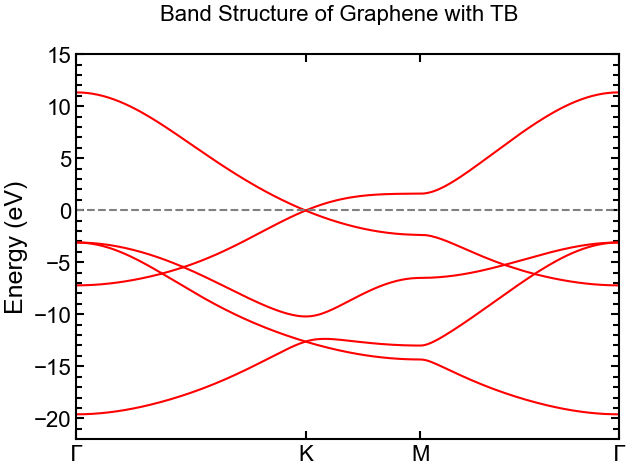

In [39]:
from pythtb import * # import TB model class

# read output from Wannier90 in folder Tight-Binding fitting
graphene = w90(r'./tight-binding fitting/', 'gr')

# get tight-binding model without hopping terms above 0.01 eV and set Fermi level 
my_model = graphene.model(zero_energy=-1.6773,min_hopping_norm=0.01)

# solve model on a path and plot it
path = [[0.0000, 0.0000, 0.0000], [0.3333, 0.3333, 0.0000], [0.5000, 0.0000, 0.0000], [0.0000, 0.0000, 0.0000] ]
# labels of the nodes
k_label = (r'$\Gamma$', r'K', r'M', r'$\Gamma$')

# call function k_path to construct the actual path
(k_vec,k_dist,k_node)=my_model.k_path(path, 201)
# calculate the model
evals=my_model.solve_all(k_vec)

# plotting the tight-binding model
fig, ax = plt.subplots(1, figsize=(7,5))
for i in range(evals.shape[0]):
    ax.plot(k_dist, evals[i], color='red')

# X-axis
ax.set_xlabel('')
ax.set_xlim(k_dist[0],k_dist[-1])
ax.set_xticks(k_node, k_label)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)
# Y-axis
ax.set_ylabel('Energy (eV)')
ax.set_ylim(-22.0, 15.0)
ax.axhline(0.0, color='gray', ls='--')

# save figure
fig.suptitle('Band Structure of Graphene with TB', fontsize=16)
fig.savefig('./Bandstructure_Graphene_TB.png', dpi=600)
plt.show()

### Optical Conductivity

In [40]:
# load data optical conductivity from folder Optical Conductivity
en_xx, sigma_r_xx, sigma_i_xx = np.loadtxt('./Optical Conductivity/gr-kubo_S_xx.dat', unpack=True)
en_yy, sigma_r_yy, sigma_i_yy = np.loadtxt('./Optical Conductivity/gr-kubo_S_yy.dat', unpack=True)
en_zz, sigma_r_zz, sigma_i_zz = np.loadtxt('./Optical Conductivity/gr-kubo_S_yy.dat', unpack=True)
en_xy, sigma_r_xy, sigma_i_xy = np.loadtxt('./Optical Conductivity/gr-kubo_A_xy.dat', unpack=True)
en_yz, sigma_r_yz, sigma_i_yz = np.loadtxt('./Optical Conductivity/gr-kubo_A_yz.dat', unpack=True)
en_zx, sigma_r_zx, sigma_i_zx = np.loadtxt('./Optical Conductivity/gr-kubo_A_zx.dat', unpack=True)

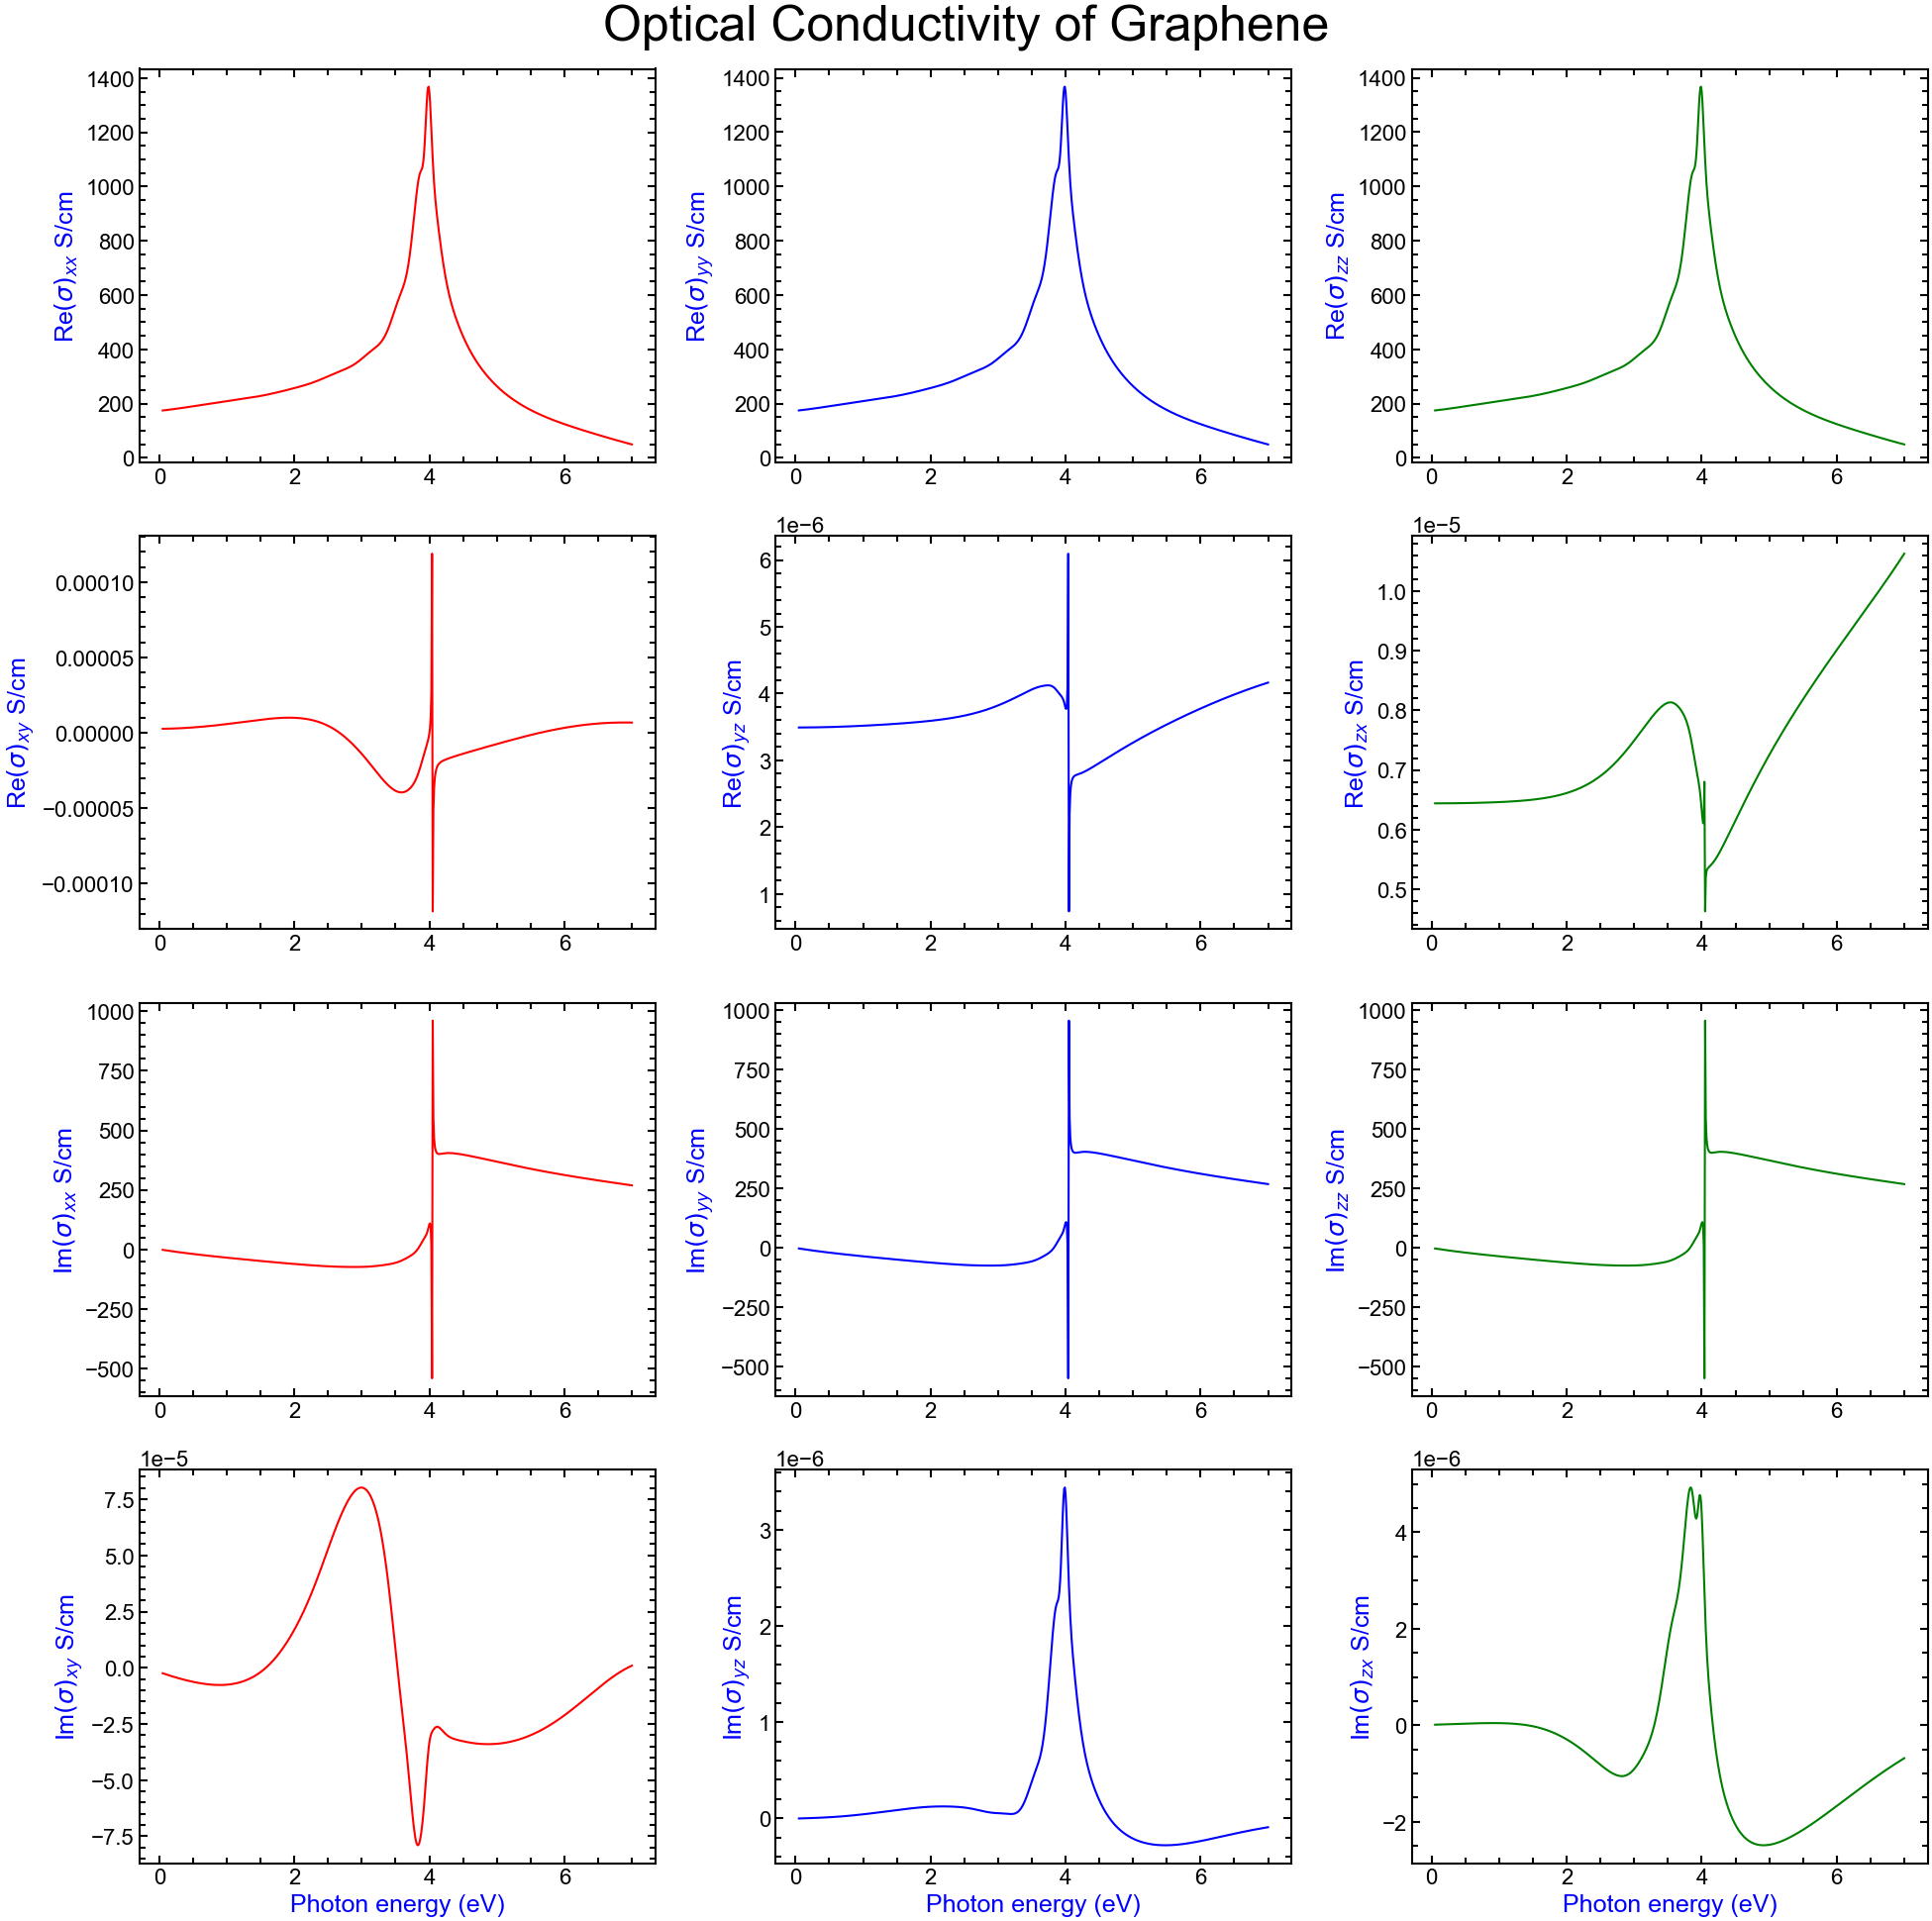

In [61]:
# Create figure object
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
# Plot the optical properties
ax[0,0].plot(en_xx, sigma_r_xx, color='red')
ax[0,1].plot(en_yy, sigma_r_yy, color='blue')
ax[0,2].plot(en_zz, sigma_r_zz, color='green')
ax[1,0].plot(en_xy, sigma_r_xy, color='red')
ax[1,1].plot(en_yz, sigma_r_yz, color='blue')
ax[1,2].plot(en_zx, sigma_r_zx, color='green')
ax[2,0].plot(en_xx, sigma_i_xx, color='red')
ax[2,1].plot(en_yy, sigma_i_yy, color='blue')
ax[2,2].plot(en_zz, sigma_i_zz, color='green')
ax[3,0].plot(en_xy, sigma_i_xy, color='red')
ax[3,1].plot(en_yz, sigma_i_yz, color='blue')
ax[3,2].plot(en_zx, sigma_i_zx, color='green')
# Add the x-axis labels
ax[3,0].set_xlabel('Photon energy (eV)', color='b')
ax[3,1].set_xlabel('Photon energy (eV)', color='b')
ax[3,2].set_xlabel('Photon energy (eV)', color='b')
# Add the y-axis labels
ax[0,0].set_ylabel(r'Re$(\sigma)_{xx}$ S/cm', color='b')
ax[0,1].set_ylabel(r'Re$(\sigma)_{yy}$ S/cm', color='b')
ax[0,2].set_ylabel(r'Re$(\sigma)_{zz}$ S/cm', color='b')
ax[1,0].set_ylabel(r'Re$(\sigma)_{xy}$ S/cm', color='b')
ax[1,1].set_ylabel(r'Re$(\sigma)_{yz}$ S/cm', color='b')
ax[1,2].set_ylabel(r'Re$(\sigma)_{zx}$ S/cm', color='b')
ax[2,0].set_ylabel(r'Im$(\sigma)_{xx}$ S/cm', color='b')
ax[2,1].set_ylabel(r'Im$(\sigma)_{yy}$ S/cm', color='b')
ax[2,2].set_ylabel(r'Im$(\sigma)_{zz}$ S/cm', color='b')
ax[3,0].set_ylabel(r'Im$(\sigma)_{xy}$ S/cm', color='b')
ax[3,1].set_ylabel(r'Im$(\sigma)_{yz}$ S/cm', color='b')
ax[3,2].set_ylabel(r'Im$(\sigma)_{zx}$ S/cm', color='b')

# save figure
fig.suptitle('Optical Conductivity of Graphene', fontsize=36)
plt.tight_layout(pad=1.5)
fig.savefig('./Optical_Conductivity_Graphene.png', dpi=600)
plt.show()

### Non-Linear Shift GaAs

In [69]:
# load data GaAs from folder non-linear shift
en_xyz, sigma_xyz = np.loadtxt('./nonlinear-shift/GaAs-sc_xyz.dat', unpack=True)
en_yxz, sigma_yxz = np.loadtxt('./nonlinear-shift/GaAs-sc_yxz.dat', unpack=True)
en_zxy, sigma_zxy = np.loadtxt('./nonlinear-shift/GaAs-sc_zxy.dat', unpack=True)

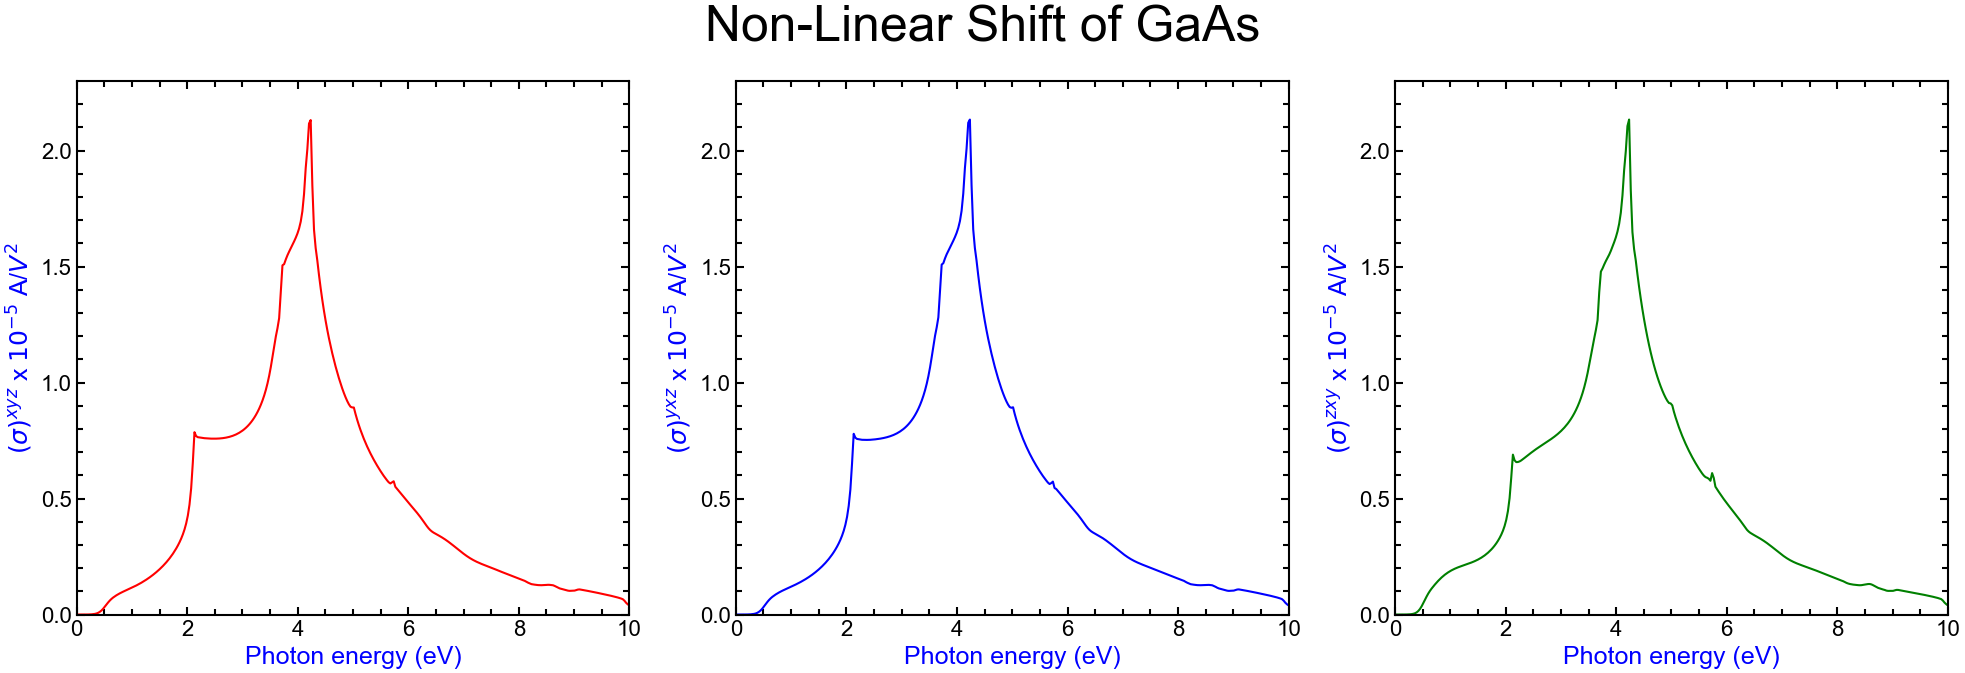

In [71]:
# Create figure object
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))
# Plot the optical properties
ax[0].plot(en_xyz, sigma_xyz*1.e5, color='red')
ax[1].plot(en_yxz, sigma_yxz*1.e5, color='blue')
ax[2].plot(en_zxy, sigma_zxy*1.e5, color='green')
# Add the x-axis labels
ax[0].set_xlabel('Photon energy (eV)', color='b')
ax[1].set_xlabel('Photon energy (eV)', color='b')
ax[2].set_xlabel('Photon energy (eV)', color='b')
# Add the y-axis labels
ax[0].set_ylabel(r'$(\sigma)^{xyz}$ x $10^{-5}$ A/$V^{2}$', color='b')
ax[1].set_ylabel(r'$(\sigma)^{yxz}$ x $10^{-5}$ A/$V^{2}$', color='b')
ax[2].set_ylabel(r'$(\sigma)^{zxy}$ x $10^{-5}$ A/$V^{2}$', color='b')
# Set the limit of x and y-axis
ax[0].set_xlim(0,10)
ax[1].set_xlim(0,10)
ax[2].set_xlim(0,10)
ax[0].set_ylim(0,2.3)
ax[1].set_ylim(0,2.3)
ax[2].set_ylim(0,2.3)

# save figure
fig.suptitle('Non-Linear Shift of GaAs', fontsize=36)
plt.tight_layout(pad=1.15)
fig.savefig('./Non_Linear_Shift_GaAs.png', dpi=600)
plt.show()